In [1]:
# Data Analysis library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

/home/juancv3d/.pyenv/versions/3.8.10/envs/Data-Analysis/lib/python3.8/site-packages/pandas/compat/__init__.py:109: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
exoplanets = pd.read_csv('data/exoplanets_discovered.csv', delimiter=',')
exoplanets

,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility
0,2,1,Radial Velocity,2007,Xinglong Station
1,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg
2,1,1,Radial Velocity,2008,Okayama Astrophysical Observatory
3,1,2,Radial Velocity,2002,W. M. Keck Observatory
4,3,1,Radial Velocity,1996,Multiple Observatories
...,...,...,...,...,...
5049,2,3,Radial Velocity,1996,Lick Observatory
5050,2,3,Radial Velocity,1999,Multiple Observatories
5051,2,3,Radial Velocity,1999,Multiple Observatories
5052,1,1,Radial Velocity,2021,Okayama Astrophysical Observatory


In [3]:
exoplanets['discoverymethod'].unique()

array(['Radial Velocity', 'Imaging', 'Eclipse Timing Variations',
       'Transit', 'Astrometry', 'Disk Kinematics',
       'Orbital Brightness Modulation', 'Pulsation Timing Variations',
       'Microlensing', 'Transit Timing Variations', 'Pulsar Timing'],
      dtype=object)

Text(0, 0.5, 'Number of Exoplanets Discovered')

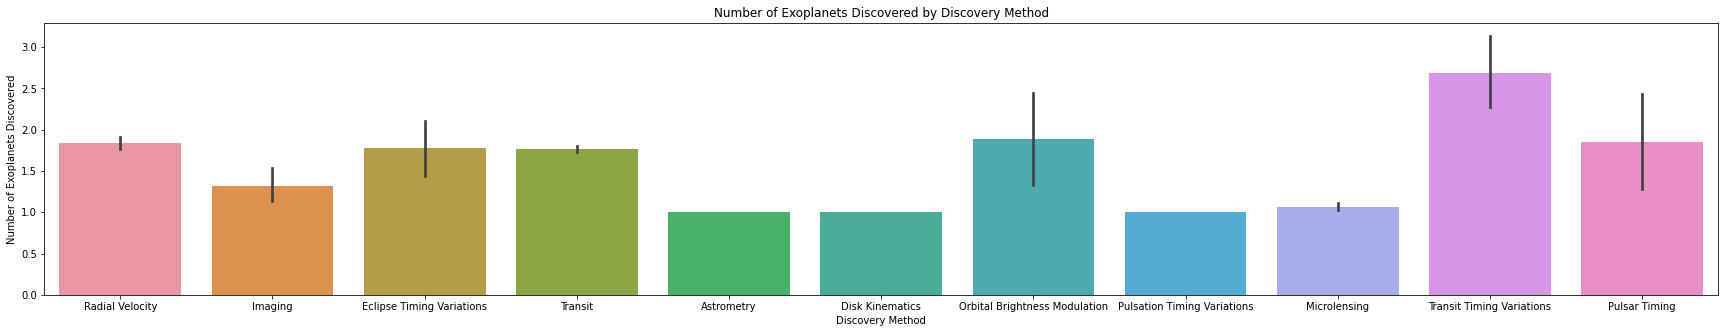

In [82]:
plt.figure(figsize=(30, 5))
sns.barplot(x='discoverymethod', y='sy_pnum', data=exoplanets)
# size plot
# tittle number of finding by type not normalized 
plt.title('Number of Exoplanets Discovered by Discovery Method')
plt.xlabel('Discovery Method')
plt.ylabel('Number of Exoplanets Discovered')



Text(0, 0.5, 'Number of Exoplanets Discovered')

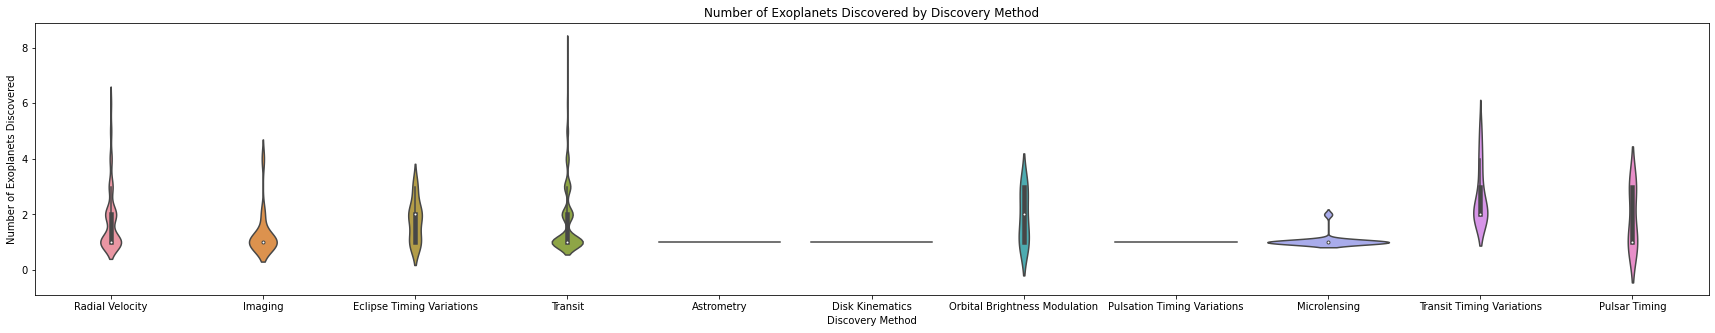

In [83]:
#violin plot
plt.figure(figsize=(30, 5))
sns.violinplot(x='discoverymethod', y='sy_pnum', data=exoplanets)
# size plot
# tittle number of finding by type not normalized
plt.title('Number of Exoplanets Discovered by Discovery Method')
plt.xlabel('Discovery Method')
plt.ylabel('Number of Exoplanets Discovered')


In [62]:
total_planet = exoplanets.groupby('discoverymethod')['sy_pnum'].value_counts()
planet_count = {}
for value, num in total_planet.items():
    if value[0] in planet_count:
        planet_count[value[0]] += num*value[1]
    else:
        planet_count[value[0]] = num*value[1]

planet_count


{'Astrometry': 1,
 'Disk Kinematics': 1,
 'Eclipse Timing Variations': 32,
 'Imaging': 79,
 'Microlensing': 138,
 'Orbital Brightness Modulation': 17,
 'Pulsar Timing': 13,
 'Pulsation Timing Variations': 2,
 'Radial Velocity': 1720,
 'Transit': 6842,
 'Transit Timing Variations': 59}

In [54]:
# this method count the total of star
total_star = exoplanets.groupby('discoverymethod')['sy_snum'].value_counts()

star_count = {}


for value, num in total_star.items():
    if value[0] in star_count:
        star_count[value[0]] += num*value[1]
    else:
        star_count[value[0]] = num*value[1]
star_count


{'Astrometry': 1,
 'Disk Kinematics': 1,
 'Eclipse Timing Variations': 37,
 'Imaging': 71,
 'Microlensing': 137,
 'Orbital Brightness Modulation': 9,
 'Pulsar Timing': 8,
 'Pulsation Timing Variations': 2,
 'Radial Velocity': 1131,
 'Transit': 4151,
 'Transit Timing Variations': 24}

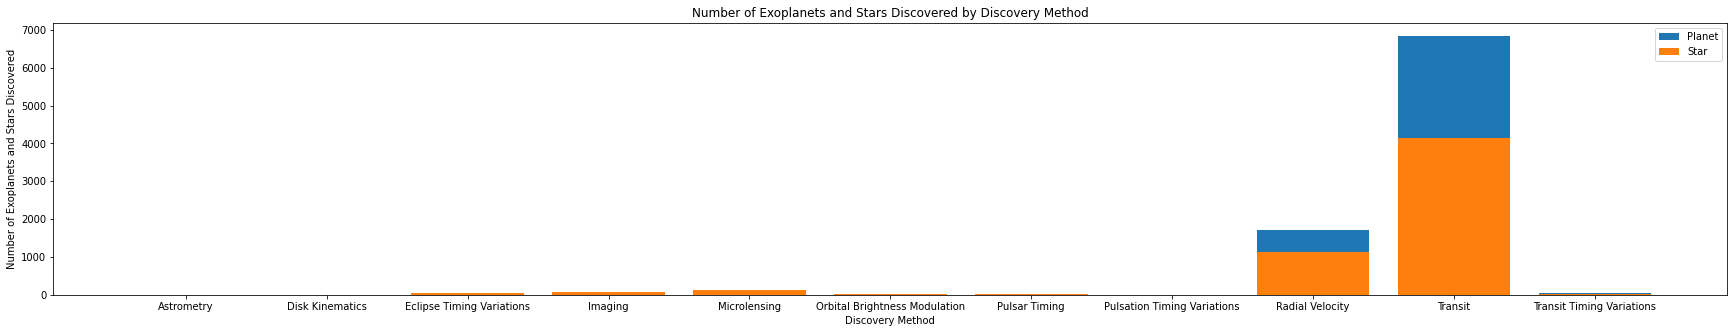

In [86]:
#plot start_count and planet_count
plt.figure(figsize=(30, 5))
plt.bar(x=list(planet_count.keys()), height=list(planet_count.values()))
plt.bar(x=list(star_count.keys()), height=list(star_count.values()))
plt.title('Number of Exoplanets and Stars Discovered by Discovery Method')
plt.xlabel('Discovery Method')
plt.ylabel('Number of Exoplanets and Stars Discovered')
plt.legend(['Planet', 'Star'])
plt.show()

In [65]:
x = np.array(exoplanets["discoverymethod"])
discovery_types = np.unique(x)
min_year = exoplanets['disc_year'].min()
max_year = exoplanets['disc_year'].max()
print(min_year, max_year)


1989 2022


In [66]:
# Make array of years and types
exoplanets_years = pd.DataFrame()
for year in range(min_year, max_year + 1):
  discovery_type_list = []
  for index, discovery_type in enumerate(discovery_types):
    numPlanets = 0
    if year > min_year:
      # numplanets is the cumulative total.
      numPlanets = exoplanets_years.at[index,year-1]
    numPlanets += pd.Series.sum((exoplanets['disc_year'] == year) & (exoplanets['discoverymethod'] == discovery_type))
    discovery_type_list.append(numPlanets)
  exoplanets_years[year] = discovery_type_list
exoplanets_years.insert(0, "Discovery Type", discovery_types)

In [67]:
exoplanets_years

,Discovery Type,1989,1990,1991,1992,1993,1994,1995,1996,1997,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Astrometry,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,Disk Kinematics,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,1
2,Eclipse Timing Variations,0,0,0,0,0,0,0,0,0,...,10,10,11,11,13,14,16,16,16,18
3,Imaging,0,0,0,0,0,0,0,0,0,...,34,36,41,43,44,45,49,51,58,60
4,Microlensing,0,0,0,0,0,0,0,0,0,...,25,31,35,45,54,75,89,108,126,130
5,Orbital Brightness Modulation,0,0,0,0,0,0,0,0,0,...,3,6,6,6,6,6,6,6,9,9
6,Pulsar Timing,0,0,0,2,2,3,3,3,3,...,5,5,5,5,7,7,7,7,7,7
7,Pulsation Timing Variations,0,0,0,0,0,0,0,0,0,...,1,1,1,2,2,2,2,2,2,2
8,Radial Velocity,1,1,1,1,1,1,2,8,9,...,476,527,574,623,672,721,788,833,912,934
9,Transit,0,0,0,0,0,0,0,0,0,...,360,1162,1262,2720,2809,3062,3175,3341,3756,3870


<AxesSubplot:>

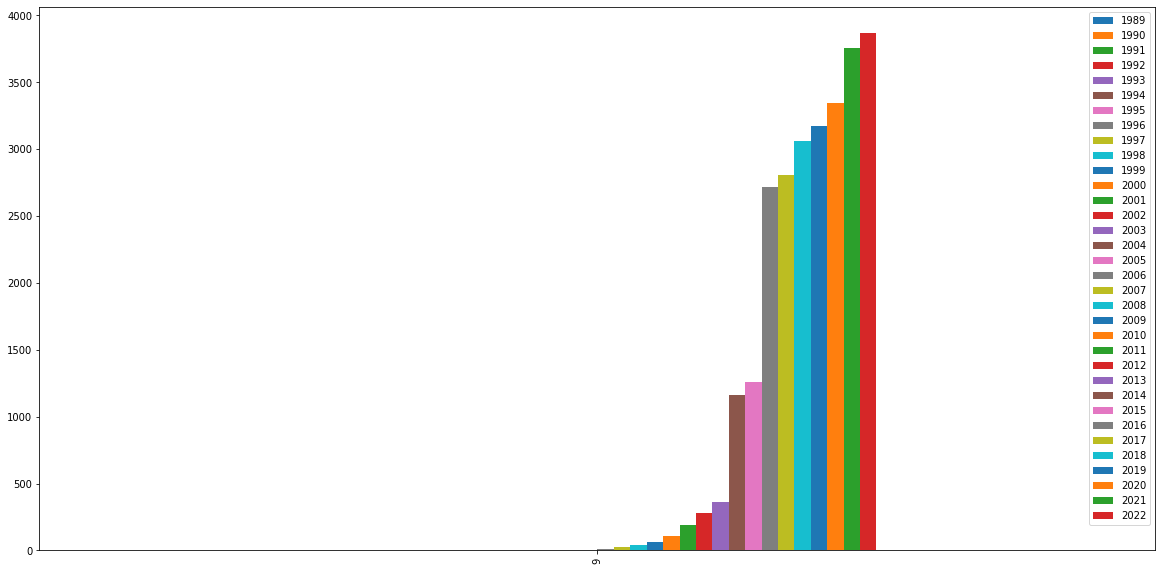

In [80]:
exoplanets_years[exoplanets_years['Discovery Type'] == 'Transit'].plot(kind='bar', figsize=(20,10))